<a href="https://colab.research.google.com/github/ivin12/Naan-Mudhalvan/blob/main/Copy_of_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I .Data Acquisition**

In [1]:
import pandas as pd

# Load the dataset from Kaggle
data = pd.read_csv("MSFT.csv")

# Display the first few rows of the dataset to inspect the data
print(data.head())


         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.062549  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.064783   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065899   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.064224    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.063107    47894400


**II. Exploratory Data Analysis (EDA)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8525 entries, 0 to 8524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8525 non-null   object 
 1   Open       8525 non-null   float64
 2   High       8525 non-null   float64
 3   Low        8525 non-null   float64
 4   Close      8525 non-null   float64
 5   Adj Close  8525 non-null   float64
 6   Volume     8525 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 466.3+ KB
None
              Open         High          Low        Close    Adj Close  \
count  8525.000000  8525.000000  8525.000000  8525.000000  8525.000000   
mean     28.220247    28.514473    27.918967    28.224480    23.417934   
std      28.626752    28.848988    28.370344    28.626571    28.195330   
min       0.088542     0.092014     0.088542     0.090278     0.058081   
25%       3.414063     3.460938     3.382813     3.414063     2.196463   
50%      26.174999   

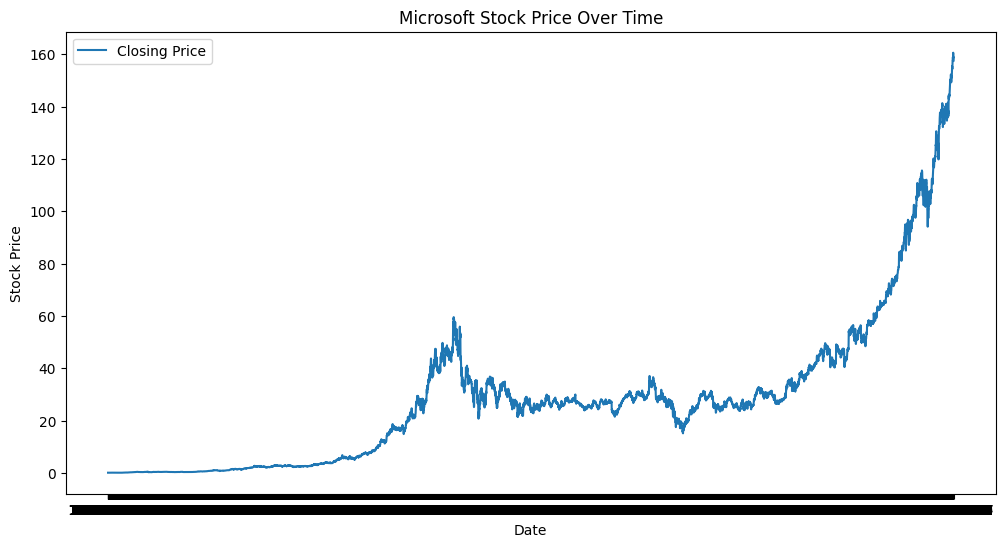

In [ ]:
# Check the dataset's structure and data types
print(data.info())

# Summary statistics
print(data.describe())

# Visualize the distribution of stock prices
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.title('Microsoft Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**Handling The Missing Data**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Handle missing values by forward-fill or interpolation
data['Close'].fillna(method='ffill', inplace=True)

# Check if missing values have been resolved
missing_values = data.isnull().sum()
print(missing_values)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


**Outliner Detection and Treatment**

In [ ]:
import numpy as np
# Detect outliers using z-scores (you can choose other methods as well)
z_scores = np.abs((data['Close'] - data['Close'].mean()) / data['Close'].std())
outliers = data[z_scores > 3]  # Adjust the threshold as needed

# Handle outliers by capping them to a certain range (e.g., 1st and 99th percentiles)
data['Close'] = np.clip(data['Close'], data['Close'].quantile(0.01), data['Close'].quantile(0.99))


**Data Format Transformation**

In [ ]:
# Convert date column to a datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create timestamp-based features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Normalize numerical features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


**Data Splitting**

In [ ]:
# Split the data into training, validation, and test sets
train_size = int(0.7 * len(data))
val_size = int(0.15 * len(data))
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[-test_size:]

# Ensure that the data is shuffled for training and validation sets
# Shuffle the training and validation datasets
train_data = train_data.sample(frac=1).reset_index(drop=True)
val_data = val_data.sample(frac=1).reset_index(drop=True)


**III. Featured Engineering**

In [ ]:
# Select relevant features for stock price prediction
# You can create additional features like technical indicators or sentiment analysis if available

# Example: Calculate the 50-day moving average
data['50_Day_MA'] = data['Close'].rolling(window=50).mean()

# Example: Calculate the relative strength index (RSI)
def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

data['RSI'] = calculate_rsi(data)

# Normalize the newly created features if necessary
# For example, use Min-Max scaling as shown in Step 5

# Verify the updated dataset
print(data.head())


        Date      Open      High       Low  Close  Adj Close      Volume  \
0 1986-03-13  0.088542  0.101563  0.088542    0.0   0.062549  1031788800   
1 1986-03-14  0.097222  0.102431  0.097222    0.0   0.064783   308160000   
2 1986-03-17  0.100694  0.103299  0.100694    0.0   0.065899   133171200   
3 1986-03-18  0.102431  0.103299  0.098958    0.0   0.064224    67766400   
4 1986-03-19  0.099826  0.100694  0.097222    0.0   0.063107    47894400   

   Year  Month  Day  50_Day_MA  RSI  
0  1986      3   13        NaN  NaN  
1  1986      3   14        NaN  NaN  
2  1986      3   17        NaN  NaN  
3  1986      3   18        NaN  NaN  
4  1986      3   19        NaN  NaN  


**IV. Data Splitting**

In [ ]:
# Step 4: Data Splitting

# Split the data into training, validation, and test sets
train_size = int(0.7 * len(data))
val_size = int(0.15 * len(data))
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[-test_size:]

# Ensure that the data is shuffled for training and validation sets
# Shuffle the training and validation datasets
train_data = train_data.sample(frac=1).reset_index(drop=True)
val_data = val_data.sample(frac=1).reset_index(drop=True)

# Verify the split datasets
print("Training Data:")
print(train_data.head())
print("\nValidation Data:")
print(val_data.head())
print("\nTest Data:")
print(test_data.head())


Training Data:
        Date       Open       High        Low     Close  Adj Close    Volume  \
0 1999-06-08  39.937500  41.062500  39.500000  0.287345  25.533251  41516400   
1 1997-02-14  12.421875  12.562500  12.203125  0.088052   7.871076  57395200   
2 1993-12-02   2.562500   2.593750   2.554688  0.018038   1.666196  51936000   
3 1997-01-10  10.250000  10.546875  10.203125  0.075688   6.775360  66556800   
4 2001-09-26  25.754999  25.900000  24.775000  0.181702  16.170797  58524400   

   Year  Month  Day  50_Day_MA        RSI  
0  1999      6    8   0.301569  51.971326  
1  1997      2   14   0.079944  53.608247  
2  1993     12    2   0.017594  54.310381  
3  1997      1   10   0.070145  47.967480  
4  2001      9   26   0.225200  34.806387  

Validation Data:
        Date       Open       High        Low     Close  Adj Close    Volume  \
0 2014-03-21  40.720001  40.939999  40.009998  0.290775  35.356197  80721800   
1 2011-09-14  26.170000  26.799999  25.889999  0.191611  21.69

** V. Model Architecture Selection**

CNN-LSTM Hybrid

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, LSTM, Attention, Flatten
from tensorflow.keras.models import Model

# Define the shape of your input data based on your attributes
# You should replace 'time_steps' and 'number_of_features' with actual values
time_steps = 10  # Define the appropriate number of time steps
number_of_features = 7  # 7 features: open, high, low, close, adj close, volume, and date

# Create an Input layer
input_layer = Input(shape=(time_steps, number_of_features))

# LSTM layer to capture temporal dependencies
lstm_layer = LSTM(64, return_sequences=True)(input_layer)

# Attention mechanism to focus on relevant information
attention = Attention()([lstm_layer, lstm_layer])

# Flatten the attention output
attention_flat = Flatten()(attention)

# Dense layer for prediction
output_layer = Dense(1)(attention_flat)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10, 7)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 10, 64)               18432     ['input_1[0][0]']             
                                                                                                  
 attention (Attention)       (None, 10, 64)               0         ['lstm[0][0]',                
                                                                     'lstm[0][0]']                
                                                                                                  
 flatten (Flatten)           (None, 640)                  0         ['attention[0][0]']       

**VI. Model Development**

Data Preparation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset from the "msft.csv" file
data = pd.read_csv("MSFT.csv")  # Replace "msft.csv" with the actual file path

# Split the data into features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = data['Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)


**VI. Model Evaluation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Initialize and train a traditional model
traditional_model = LinearRegression()
traditional_model.fit(X_train, y_train)

# Make predictions and calculate evaluation metrics
y_pred_traditional = traditional_model.predict(X_test)
mae_traditional = mean_absolute_error(y_test, y_pred_traditional)
rmse_traditional = np.sqrt(mean_squared_error(y_test, y_pred_traditional))

print(f"Traditional Model - Mean Absolute Error (MAE): {mae_traditional:.2f}")
print(f"Traditional Model - Root Mean Square Error (RMSE): {rmse_traditional:.2f}")


Traditional Model - Mean Absolute Error (MAE): 0.13
Traditional Model - Root Mean Square Error (RMSE): 0.23
